# Hands-on introduction to image processing for data science and deep learning.
###### Author and Instructor: __Matei Iordanescu__
Concepts:
1)  [What is an image?](#Concept-1:-What-is-an-image?)  
2)  [Meet Lena](#Concept-2:-Meet-Lena)  
3)  [What actually is an image?](#Concept-3:-What-actually-is-an-image?)  
4)  [The most basic coding pattern for image processing](#Concept-4:-The-most-basic-coding-pattern-for-image-processing)  
5)  [Real example of image processing](#Concept-5:-Real-example-of-image-processing)  
6)  [Kernel convolution](#Concept-6:-Kernel-convolution)  
    -1) [Vertical edges](#1:-Vertical-edges)  
    -2) [Horizontal edges](#2:-Horizontal-edges)  
    -3) [Blurring](#3:-Blurring)  
    -4) [Sharpening](#4:-Sharpening)  
    -5) [Embossing](#5:-Embossing)
7)  [Edge Detection](#Concept-7:-Edge-Detection)  
8)  [Connection to DeepLearning](#Concept-8:-Connection-to-DeepLearning)
   


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from PIL import Image
from IPython.display import display
import math
import numpy as np

## Concept 1: What is an image?
An image starts as a file saved on a disk in a computer. To read the image, you can use any programing language and leverage any image libraries. Here we use Python and Pillow (PIL for short), a Python library. After reading an image with PIL, you get a PIL image object which has many methods and properties you can query to understand and manipulate your image. For example, you can get the size of the image using the size function or you can display it using the display function.  

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

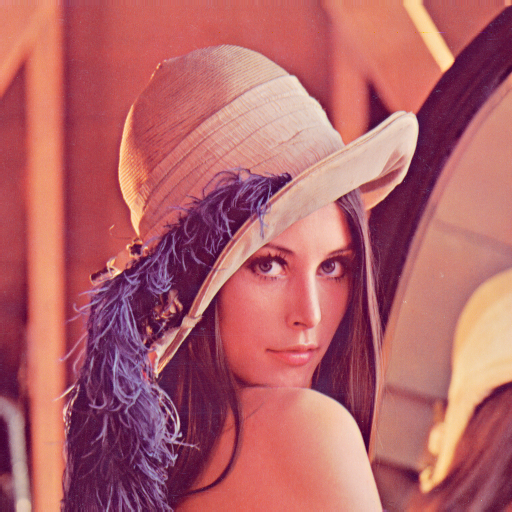

(512, 512)

In [3]:
path = "/workspace/Data/Lena_Colored.jpeg" 
img = Image.open(path)
width, height=img.size
display(img)
width, height

## Concept 2: Meet Lena
Lenna (or Lena) is a standard test image used in the field of digital image processing, starting in 1973. It is a picture of the Swedish model Lena Forsén, shot by photographer Dwight Hooker and cropped from the centerfold of the November 1972 issue of Playboy magazine.
[__Who is Lena__](https://www.google.com/search?q=who+is+lena+in+image+processing&sca_esv=deba1d0118d8a222&rlz=1C1OPNX_enUS1124US1125&biw=1536&bih=730&sxsrf=ADLYWIKGnvQrjBs_HkfopC1miBK1yLWjkQ%3A1732911290226&ei=uiBKZ6C2Dcqp5NoPrfffsQI&ved=0ahUKEwig-4XPrYKKAxXKFFkFHa37NyYQ4dUDCA8&uact=5&oq=who+is+lena+in+image+processing&gs_lp=Egxnd3Mtd2l6LXNlcnAiH3dobyBpcyBsZW5hIGluIGltYWdlIHByb2Nlc3NpbmcyCBAhGKABGMMEMggQIRigARjDBEiFDFC_B1jtCnABeAGQAQCYAWugAdEBqgEDMC4yuAEDyAEA-AEBmAIDoALdAcICChAAGLADGNYEGEfCAggQABiABBiiBJgDAIgGAZAGCJIHAzEuMqAHqQc&sclient=gws-wiz-serp)  

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

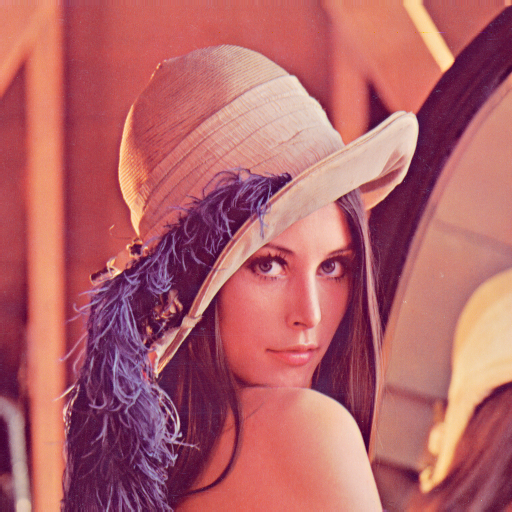

In [4]:
display(img)

## Concept 3: What actually is an image?
An image is an array of pixels, with each pixel being a tuple with three values corresponding to its respective R, G, and B color intensities, each typically ranging from 0-255. To find a certain pixel in an image using the PIL library, you give two indices (which correspond to rows and columns) to a function, just like any other image library. 

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

In [5]:
# guestimate of a blue-ish pixel
p = img.getpixel((450, 100))
red_intensity = p[0]
green_intensity = p[1]
blue_intensity = p[2]
red_intensity,green_intensity,blue_intensity

# guestimate of a red-ish pixel
p = img.getpixel((50, 100))
red_intensity = p[0]
green_intensity = p[1]
blue_intensity = p[2]
red_intensity,green_intensity,blue_intensity

(101, 22, 64)

(232, 140, 120)

In [6]:
# pretend=[[(1,2,3), (4,5,6), (7,8,9),(10,11,12)], [(13,14,15), (16,17,18), (19,20,21),(22,23,24)]]
# for row_counter in range(0, 2):
#         for column_counter in range(0, 4):
#             print(pretend[row_counter][column_counter])

## Concept 4: The most basic coding pattern for image processing
The most basic pattern is two embedded loops that iterate over an image's rows and columns. 

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

In [7]:
def DuplicateImg(img):
    width, height=img.size
    newimg = Image.new("RGB", (width, height), "white")
    for row_counter in range(0, height):
        for column_counter in range(0, width):
            p = img.getpixel((row_counter, column_counter))
            newimg.putpixel((row_counter,column_counter),p)
    return newimg

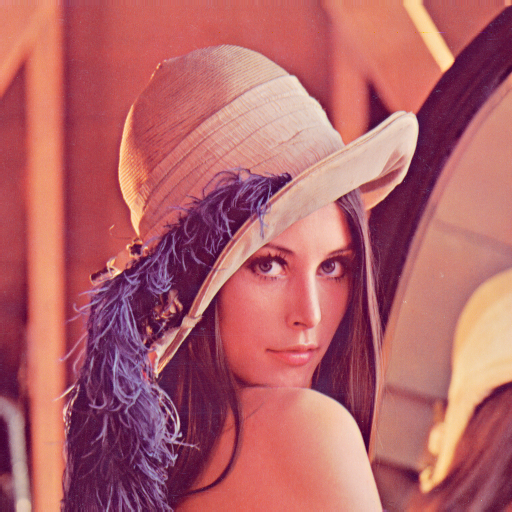

In [8]:
DuplicateImg(img)

## Concept 5: Real example of image processing
### Thresholding:
 - One of the simplest examples of image processing
 - Here we generate a black and white image

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

In [16]:
def Threshold(img, threshold):
    width, height=img.size
    newimg = Image.new("RGB", (width, height), "white")
    
    for row_counter in range(0, height):
        for column_counter in range(0, width):
            p = img.getpixel((row_counter, column_counter))
            r = p[0]
            g = p[1]
            b = p[2]
            if ((r + g + b)/3)>=threshold:
                newimg.putpixel((row_counter,column_counter),(255,255,255))
            else:
                newimg.putpixel((row_counter,column_counter),(0,0,0))
    return(newimg)

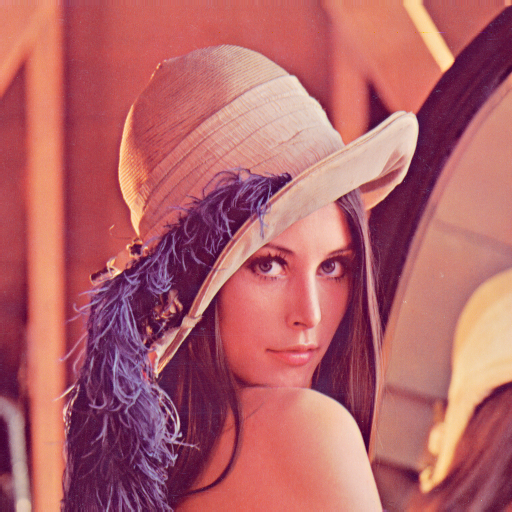

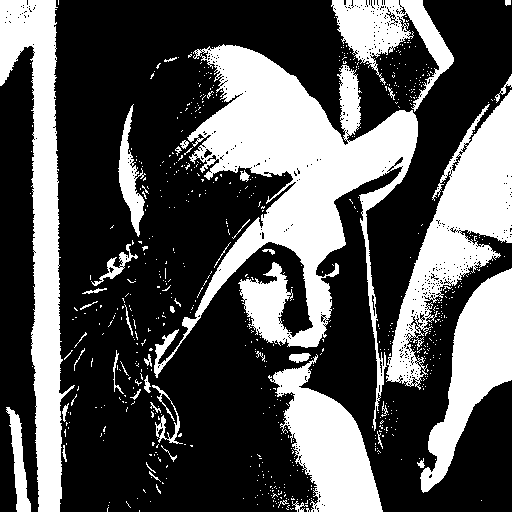

In [22]:
display(img)
Threshold(img, 150)

## Concept 6: Kernel convolution

In this tutorial, we will focus on kernel convolution which is a more advanced and powerful type of image-processing technique. Kernel convolution involves an N by N matrix (also called a kernel), with a matching N by N sliding window in the image.  

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

In [23]:
def Normalize(nparray: np.ndarray, maxv: float=255):
    nparray0 = nparray.astype(np.float64)
    width= nparray0.shape[0]
    height= nparray0.shape[1] 
    min_intensity = nparray.min()
    max_intensity = nparray.max()
    newnparray = maxv* (nparray0 - min_intensity)/(max_intensity - min_intensity)
    return newnparray
    
def ConvolveImgKer(img, kernel):
    width, height=img.size
    newimgnparray = np.zeros(((height-2), (width-2), 3)).astype(np.float64)
    float_kernel = [[float(x) for x in sublist] for sublist in kernel]
    for row_counter in range(1, height-1):
        for column_counter in range(1, width-1):
            Gp=0
            p = img.getpixel((row_counter-1, column_counter-1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[0][0]
            p = img.getpixel((row_counter-1, column_counter))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[0][1]
            p = img.getpixel((row_counter-1, column_counter+1))
            Gp += float((p[0] + p[1] + p[2])/3)*float_kernel[0][2]
            p = img.getpixel((row_counter, column_counter-1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[1][0]
            p = img.getpixel((row_counter, column_counter))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[1][1]
            p = img.getpixel((row_counter, column_counter+1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[1][2]
            p = img.getpixel((row_counter+1, column_counter-1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[2][0]
            p = img.getpixel((row_counter+1, column_counter))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[2][1]
            p = img.getpixel((row_counter+1, column_counter+1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[2][2]
            newimgnparray[column_counter-1][row_counter-1][0]=Gp
            newimgnparray[column_counter-1][row_counter-1][1]=Gp
            newimgnparray[column_counter-1][row_counter-1][2]=Gp
    return Image.fromarray(Normalize(newimgnparray).astype(np.uint8))

### Practical examples: 

#### 1: Vertical edges

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

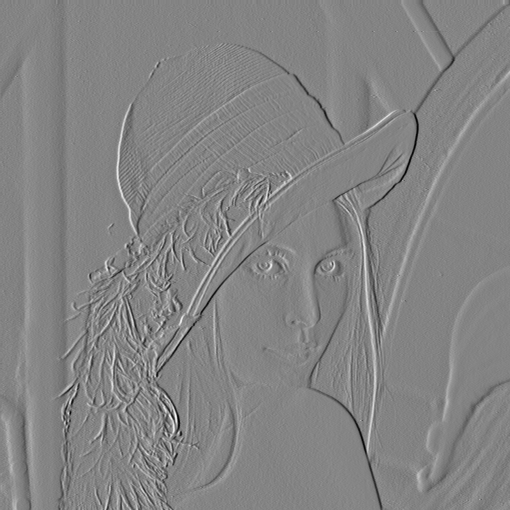

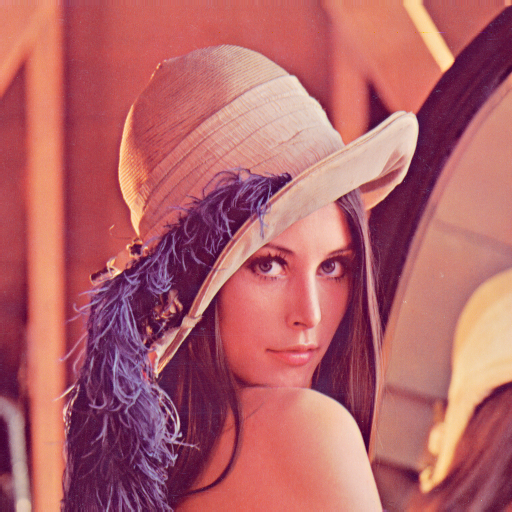

In [14]:
kernel=[[0,-1,0],[0,0,0],[0,1,0]]
convolvedimg=ConvolveImgKer(img, kernel)
display(convolvedimg)
display(img)

#### 2) Horizontal edges

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

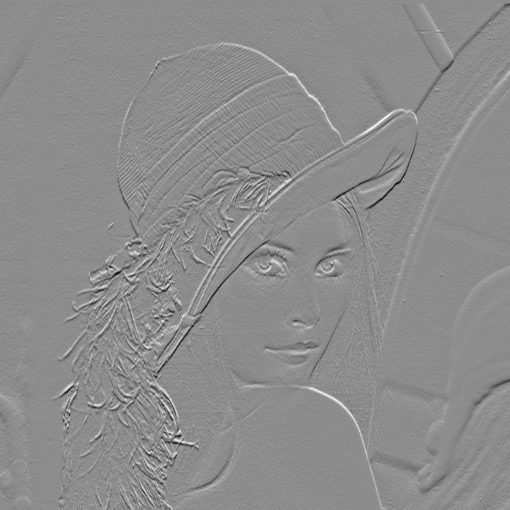

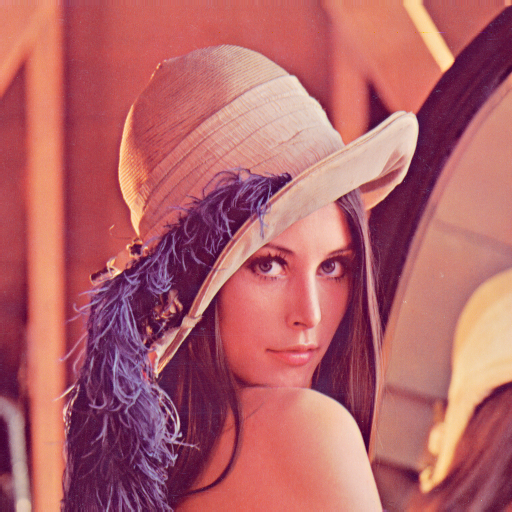

In [15]:
kernel=[[0,0,0],[-1,0,1],[0,0,0]]
convolvedimg=ConvolveImgKer(img, kernel)
display(convolvedimg)
display(img)

#### 3: Blurring

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

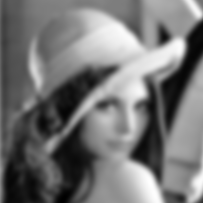

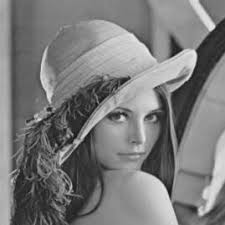

In [16]:
kernel=[[1,1,1],[1,1,1],[1,1,1]]
path = "/workspace/Data/Lena.jpeg" 
img_small = Image.open(path)
convolvedimg=ConvolveImgKer(img_small, kernel)
for counter in range(10):
    convolvedimg=ConvolveImgKer(convolvedimg, kernel)
display(convolvedimg)
display(img_small)

#### 4: Sharpening  

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

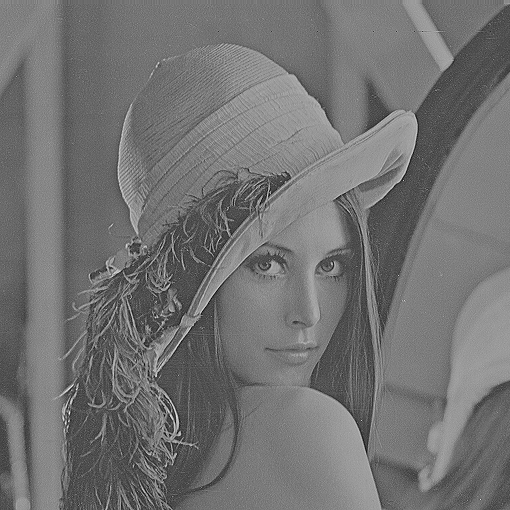

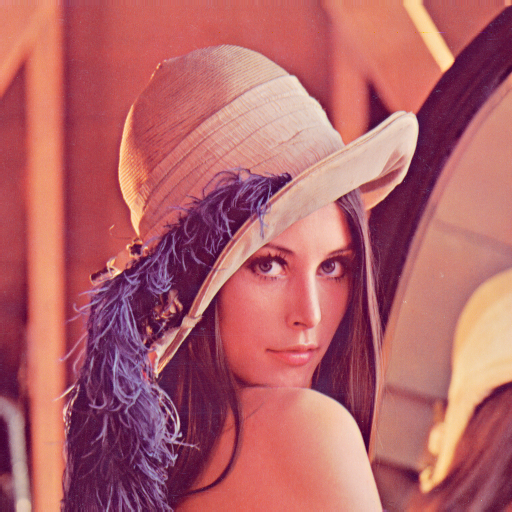

In [17]:
kernel=[[0,-1,0],[-1,5,-1],[0,-1,0]]
convolvedimg=ConvolveImgKer(img, kernel)
display(convolvedimg)
display(img)

#### 5: Embossing  

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

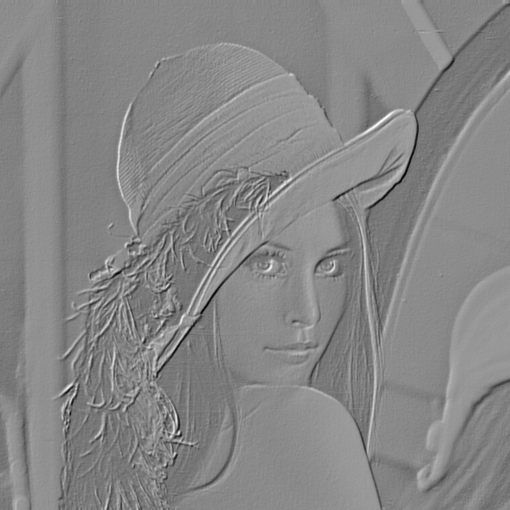

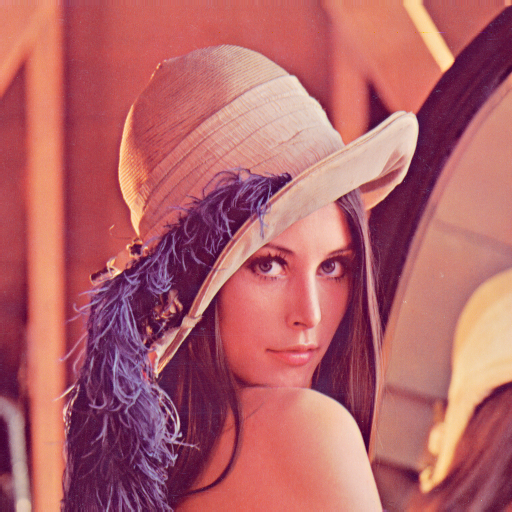

In [18]:
kernel=[[-2,-1,0],[-1,1,1],[0,1,2]]
convolvedimg=ConvolveImgKer(img, kernel)
display(convolvedimg)
display(img)

## Concept 7: Edge Detection

Leverage the gradient to detect edges at all angles

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)

In [19]:
def GradientMagnitude(img):
    width, height=img.size
    newimg = Image.new("RGB", (width-2, height-2), "white")
    for row_counter in range(1, height-1):
        for column_counter in range(1, width-1):
            p1 = img.getpixel((row_counter, column_counter-1))
            p2 = img.getpixel((row_counter, column_counter+1))
            Gx=((p2[0] + p2[1] + p2[2])/3)-((p1[0] + p1[1] + p1[2])/3)
            p1 = img.getpixel((row_counter-1, column_counter))
            p2 = img.getpixel((row_counter+1, column_counter))
            Gy=((p2[0] + p2[1] + p2[2])/3)-((p1[0] + p1[1] + p1[2])/3)
            magnitude=math.sqrt((Gx * Gx) + (Gy * Gy))
            magnitude = int(magnitude)
            newimg.putpixel((row_counter-1,column_counter-1),(magnitude,magnitude,magnitude))
    return newimg

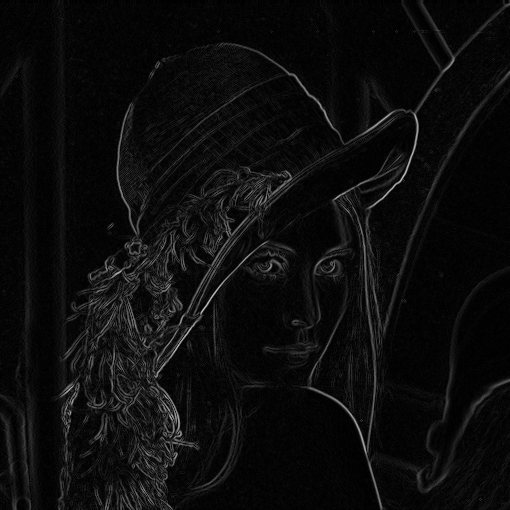

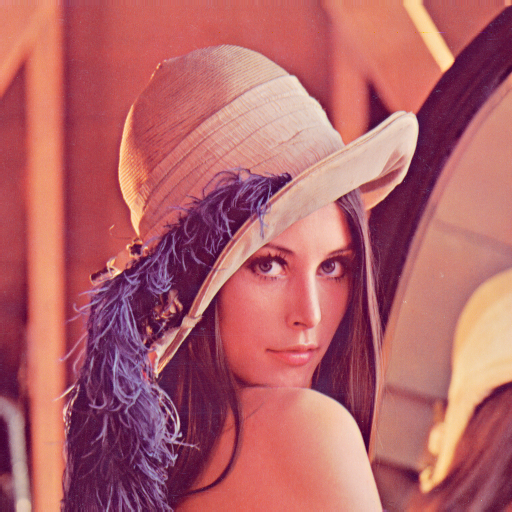

In [20]:
GradientMagnitude(img)
display(img)

## Concept 8: Connection to DeepLearning

### Machine Learning (ML):

- A class of algorithms that learn thresholds from input data.
- Creates models to classify new, unseen data.

### Artificial Neural Networks (ANN):

- A subset of ML using artificial neurons grouped in layers.
- Performs learning tasks by mimicking brain-like processes.


### Deep Learning (DL):

- A specialized class of ANN utilizing many layers.
- Employs Convolutional Neural Networks (CNNs) to identify image patterns, similar to kernel convolution.

### Why are the image processing concepts covered here relevant to DeepLearning:

- Builds a foundation for understanding the mechanics of deep learning.
- Explains how deep learning effectively extracts relevant information from images.

Back to [Summary](#Hands-on-introduction-to-image-processing-for-data-science-and-deep-learning.)